### Thematic modeling

#### Data processing

In [ ]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
responses = []
with bz2.BZ2File('banki_responses (1).json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:45, 4422.65it/s]


In [ ]:
responses[99]

{'city': 'г. Саратов',
 'rating_not_checked': False,
 'title': 'Карта ко вкладу',
 'num_comments': 0,
 'bank_license': 'лицензия № 880',
 'author': 'ronnichka',
 'bank_name': 'Югра',
 'datetime': '2015-06-03 20:56:57',
 'text': 'Здравствуйте! Хотела написать, что мне месяц не выдают карту ко вкладу, ссылаясь на "нам же их из Самары везут" (на секундочку 5 часов езды от нашего города). Но! Прочитала, что людям 3,5 месяцев не выдают карту, и поняла, что у меня все хорошо, пока что. И подарок мне дали, и кулер в отделении есть. Так что я, конечно, готова ждать. Правда хотелось бы не очень долго.',
 'rating_grade': 3}

#### Text analysis

***1. Посчитайте количество отзывов в разных городах и на разные банки***

---



In [ ]:
len(responses)

153499

Кол-во отзывов по разным банкам и городам лежат в переменных banks и cities соответсвенно

In [ ]:
banks = dict()
cities = dict()

for resp in responses:
  key_bank = resp.get("bank_name").lower()
  key_city = resp.get("city").lower() if resp.get("city") is not None else None

  if (key_bank in banks):
    banks[key_bank] += 1
  else:
    banks[key_bank] = 1

  if (key_city in banks):
    cities[key_city] += 1
  else:
    cities[key_city] = 1


print("Кол-во банков: {}".format(len(banks)))
print("Кол-во городов: {}".format(len(cities)))

Кол-во банков: 670
Кол-во городов: 5236


Первые 10 банков по количеству отзывов

In [ ]:
sorted([[x, y] for x, y in banks.items()], key=lambda elem: elem[1], reverse=True)[:10]

[['сбербанк россии', 26327],
 ['альфа-банк', 10224],
 ['втб 24', 8185],
 ['русский стандарт', 7943],
 ['хоум кредит банк', 7549],
 ['тинькофф банк', 5387],
 ['национальный банк «траст»', 4607],
 ['ренессанс кредит', 3849],
 ['связной банк', 3775],
 ['отп банк', 3237]]

***2. Постройте гистограмы длин текстов в символах и в словах***

---



In [ ]:
df = pd.DataFrame(responses)
df.head()

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN
2,г. Москва,False,Двойное списание за один товар.,1,лицензия № 2562,Vladimir84,Бинбанк,2015-06-05 20:14:28,Здравствуйте! Дублирую свое заявление от 03.0...,NaN
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,лицензия № 1481,643609,Сбербанк России,2015-06-05 13:51:01,Добрый день!! Я открыл расчетный счет в СберБа...,NaN
4,г. Челябинск,False,Верните денежные средства за страховку,1,лицензия № 2766,anfisa-2003,ОТП Банк,2015-06-05 10:58:12,"04.03.2015 г. взяла кредит в вашем банке, заяв...",NaN


In [ ]:
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
df["words_counter"] = [len([token for token in word_tokenize(text) if token not in punctuation]) for text in df.text]

In [ ]:
df["symbols_counter"] = [len(text) for text in df.text]

In [ ]:
df.head()

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade,words_counter,symbols_counter
0,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN,222,1523
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN,136,1026
2,г. Москва,False,Двойное списание за один товар.,1,лицензия № 2562,Vladimir84,Бинбанк,2015-06-05 20:14:28,Здравствуйте! Дублирую свое заявление от 03.0...,NaN,93,588
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,лицензия № 1481,643609,Сбербанк России,2015-06-05 13:51:01,Добрый день!! Я открыл расчетный счет в СберБа...,NaN,124,740
4,г. Челябинск,False,Верните денежные средства за страховку,1,лицензия № 2766,anfisa-2003,ОТП Банк,2015-06-05 10:58:12,"04.03.2015 г. взяла кредит в вашем банке, заяв...",NaN,308,1896


<Axes: >

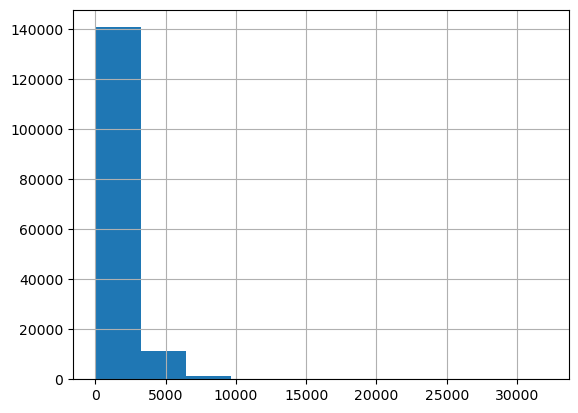

In [ ]:
df.symbols_counter.hist()

<Axes: >

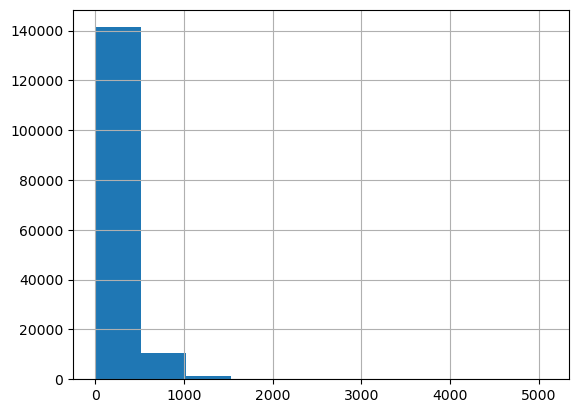

In [ ]:
df.words_counter.hist()

3. Найдите 10 самых частых:
  * слов
  * слов без стоп-слов
  * лемм
  * существительных

---



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
!pip install pymystem3
from pymystem3 import Mystem

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/55.5 kB ? eta -:--:--
     -------------- ----------------------- 20.5/55.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 55.5/55.5 kB 580.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.2 MB 1.7 MB/s eta 0:00:05
     - -------------------------------------- 0.3/8.2 MB 3.4 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/8.2 MB 4.5 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/8.2 MB 8.0 MB/s eta 0:00:01
     ------------ --------------------------- 2.6/8.2 MB 11.8 MB/s eta 0:00:01
     ------------------ --------------------- 3.8/8.2 MB 13.4 MB/s eta 0:00:01
     ------------------------ --------------- 5.1/8.2 MB 15.5 MB/s eta 0:00:01
     ----------------------------- ---------- 6.0/8.2 MB 15.9 MB/s eta 0:00

In [ ]:
def pymorphy2_311_hotfix():
    from inspect import getfullargspec
    from pymorphy2.units.base import BaseAnalyzerUnit

    def _get_param_names_311(klass):
        if klass.__init__ is object.__init__:
            return []
        args = getfullargspec(klass.__init__).args
        return sorted(args[1:])

    setattr(BaseAnalyzerUnit, '_get_param_names', _get_param_names_311)

In [ ]:
pymorphy2_311_hotfix()

In [ ]:
!python --version

Python 3.11.5


т.к. не хватает памяти на токенизацию за один раз, то делаем это итерациями

In [ ]:
def word_counter(df):
    n = 10_000
    max_n = len(df)
    counter_dict = dict()
    vec = CountVectorizer()

    while n <= max_n:
        bow = vec.fit_transform(df.iloc[n-10_000:n].text)

        word_list = vec.get_feature_names_out()
        count_list = bow.toarray().sum(axis=0)

        for x, y in zip(word_list, count_list):
            if (x in counter_dict):
                counter_dict[x] += y
            else:
                counter_dict[x] = y

        print(n)
        if n == max_n:
            break
        n = n + 10_000 if n < max_n else max_n

    return counter_dict

def word_counter_without_stopwords(df):
    n = 10_000
    max_n = len(df)
    counter_dict = dict()
    vec = CountVectorizer()

    while n <= max_n:
        bow = vec.fit_transform(df.iloc[n-10_000:n].text)

        word_list = vec.get_feature_names_out()
        count_list = bow.toarray().sum(axis=0)

        for x, y in zip(word_list, count_list):
            if x in stopwords.words('russian'):
                continue
            if (x in counter_dict):
                counter_dict[x] += y
            else:
                counter_dict[x] = y

        print(n)
        if n == max_n:
            break
        n = n + 10_000 if n < max_n else max_n

    return counter_dict

def lemm_counter_without_stopwords(df, noun=False):
    n = 10_000
    max_n = len(df)
    counter_dict = dict()
    vec = CountVectorizer()
    pymorphy2_analyzer = MorphAnalyzer()

    while n <= max_n:
        bow = vec.fit_transform(df.iloc[n-10_000:n].text)

        word_list = vec.get_feature_names_out()
        count_list = bow.toarray().sum(axis=0)

        for x, y in zip(word_list, count_list):
            lemma = pymorphy2_analyzer.parse(x)[0]
            key = lemma.normal_form
            if noun:
                if 'NOUN' in lemma.tag:
                    if key in stopwords.words('russian'):
                        continue
                    if (key in counter_dict):
                        counter_dict[key] += y
                    else:
                        counter_dict[key] = y
            else:
                if key in stopwords.words('russian'):
                    continue
                if (key in counter_dict):
                    counter_dict[key] += y
                else:
                    counter_dict[key] = y

        print(n)
        if n == max_n:
            break
        n = n + 10_000 if n < max_n else max_n

    return counter_dict

regex = re.compile("[А-Яа-я]+")

def my_lemmatize(text):
    pymorphy2_analyzer = MorphAnalyzer()

    try:
        return " ".join([pymorphy2_analyzer.parse(token)[0].normal_form for token in " ".join(regex.findall(text)).split() if not token in stopwords.words('russian')])
    except:
        return ""

def add_lemms(df):
    iter_k = 10_000
    n = 10_000
    copy_df = df.copy()
    max_n = len(copy_df)
    tmp_df = None
    total_df = None

    while n <= max_n:
        tmp_df = copy_df.iloc[n-iter_k:n].text.str.lower().apply(my_lemmatize).to_frame()

        if total_df is None:
            total_df = tmp_df.copy()
            total_df.to_csv('lemma_df_out_{}.csv'.format(n))
        else:
            total_df = pd.concat([total_df, tmp_df], ignore_index=True)
            total_df.to_csv('lemma_df_out_{}.csv'.format(n))

        print(n)
        gc.collect()
        if n == max_n:
            break

        n = n + iter_k if n + iter_k < max_n else max_n

    return total_df

In [ ]:
words = word_counter(df)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


топ 10 слов

In [ ]:
for word in sorted(words, key=words.get, reverse=True)[:10]:
    print(word, words[word])

не 840632
на 698119
что 631817
по 368029
мне 317448
банка 273159
банк 212480
как 202625
но 197070
за 189398


топ 10 слов без стоп слов

In [ ]:
words_without_stopwords = word_counter_without_stopwords(df)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


In [ ]:
for word in sorted(words_without_stopwords, key=words_without_stopwords.get, reverse=True)[:10]:
    print(word, words_without_stopwords[word])

банка 273159
банк 212480
это 180295
деньги 129499
карту 104427
карты 100865
кредит 79411
день 75708
банке 71068
заявление 69833


In [ ]:
lemms_without_stopwords = lemm_counter_without_stopwords(df)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


топ 10 лемм без стоп слов

In [ ]:
for word in sorted(lemms_without_stopwords, key=lemms_without_stopwords.get, reverse=True)[:10]:
    print(word, lemms_without_stopwords[word])

банк 660069
карта 331167
это 303745
всё 196630
деньга 177419
день 171421
кредит 153089
который 147132
отделение 142199
счёт 140594


In [ ]:
noun_lemms_without_stopwords = lemm_counter_without_stopwords(df, noun=True)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


In [ ]:
df_with_lems = add_lemms(df)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
153499


топ 10 лемм существительных без стоп слов

In [ ]:
for word in sorted(noun_lemms_without_stopwords, key=noun_lemms_without_stopwords.get, reverse=True)[:10]:
    print(word, noun_lemms_without_stopwords[word])

банк 660069
карта 331167
деньга 177419
день 171421
кредит 153089
отделение 142199
счёт 140594
клиент 134888
сотрудник 133031
сумма 109975


#### 4. Постройте кривые Ципфа и Хипса

Кривая Ципфа

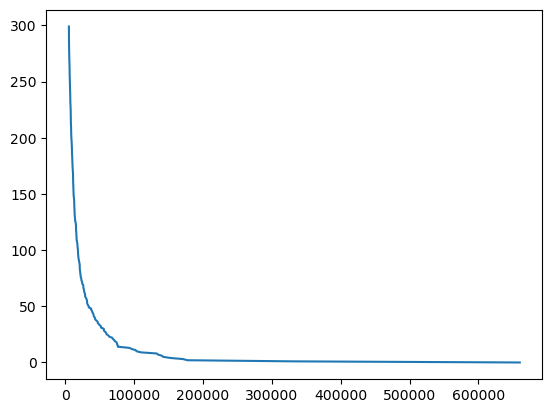

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(noun_lemms_without_stopwords.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

Крифая Хипса

In [ ]:
import gc

def lemm_tokenize_without_stopwords(df, noun=False):
    k = 5_000
    n = 5_000
    max_n = len(df)
    counter_dict = dict()
    vec = CountVectorizer()
    pymorphy2_analyzer = MorphAnalyzer()
    n_words = []
    n_tokens = []

    while n <= max_n:
        bow = vec.fit_transform(df.iloc[n-k:n].text)

        word_list = vec.get_feature_names_out()
        count_list = bow.toarray()

        for row in count_list:
            for i, elem in enumerate(row):
                if elem:
                    lemma = pymorphy2_analyzer.parse(word_list[i])[0]
                    key = lemma.normal_form
                    if noun:
                        if 'NOUN' in lemma.tag:
                            if key in stopwords.words('russian'):
                                continue
                            if (key in counter_dict):
                                counter_dict[key] += elem
                            else:
                                counter_dict[key] = elem
                    else:
                        if key in stopwords.words('russian'):
                            continue
                        if (key in counter_dict):
                            counter_dict[key] += elem
                        else:
                            counter_dict[key] = elem

        n_words.append(len(counter_dict.keys()))
        n_tokens.append(sum(list(counter_dict.values())))
        gc.collect()

        print("n_words: {}".format(n_words[-1]))
        print("n_tokens: {}".format(n_tokens[-1]))

        print(n)
        if n == max_n:
            break
        n = n + k if n < max_n else max_n

    return (n_words, n_tokens)

In [ ]:
n_words, n_tokens = lemm_tokenize_without_stopwords(df, True)

n_words: 8673
n_tokens: 310665
5000
n_words: 12269
n_tokens: 630591
10000
n_words: 14935
n_tokens: 947565
15000
n_words: 17235
n_tokens: 1266155
20000
n_words: 19251
n_tokens: 1575549
25000
n_words: 21061
n_tokens: 1904627
30000
n_words: 22810
n_tokens: 2248287
35000
n_words: 24409
n_tokens: 2581821
40000
n_words: 25919
n_tokens: 2901624
45000
n_words: 27383
n_tokens: 3233901
50000
n_words: 28766
n_tokens: 3568061
55000
n_words: 30178
n_tokens: 3908264
60000
n_words: 31552
n_tokens: 4244772
65000
n_words: 32993
n_tokens: 4595878
70000
n_words: 34260
n_tokens: 4938211
75000
n_words: 35547
n_tokens: 5288730
80000
n_words: 36803
n_tokens: 5643605
85000
n_words: 37991
n_tokens: 6001354
90000
n_words: 39233
n_tokens: 6359764
95000
n_words: 40498
n_tokens: 6734416
100000
n_words: 41843
n_tokens: 7101046
105000
n_words: 42918
n_tokens: 7460269
110000
n_words: 44186
n_tokens: 7843963
115000
n_words: 45498
n_tokens: 8235693
120000
n_words: 46716
n_tokens: 8633636
125000
n_words: 47939
n_tokens:

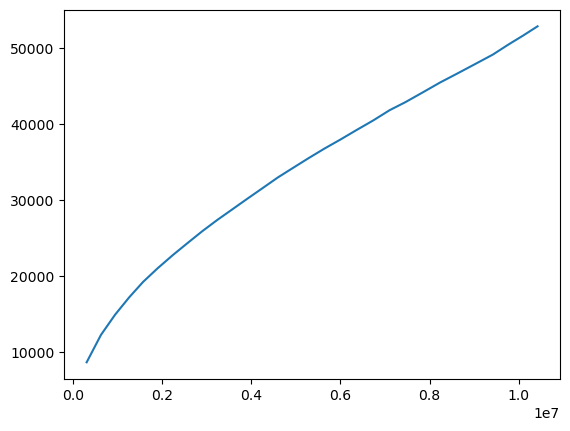

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.show()

Ответьте на следующие вопросы:
* какое слово встречается чаще, "сотрудник" или "клиент"?
* сколько раз встречается слова "мошенничество" и "доверие"?

Слово "клиент" встречается чаще чем "сотрудник"

Слово "мошенничество" - 3225

Слово "доверие" - 2086

In [ ]:
print("сотрудник: {} -- клиент: {}".format(noun_lemms_without_stopwords["сотрудник"], noun_lemms_without_stopwords["клиент"]))
print("мошенничество: {} -- доверие: {}".format(noun_lemms_without_stopwords["мошенничество"], noun_lemms_without_stopwords["доверие"]))

сотрудник: 133031 -- клиент: 134888
мошенничество: 3225 -- доверие: 2086


В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру
, для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(len(df[df['rating_grade'] == 5]))
print(len(df[df['rating_grade'] == 1]))

14713
47387


In [ ]:
def tfidf_vectorizer(df, ngrams=(1,1), grade=1):
    n = 5_000
    tmp_df = df[df['rating_grade'] == grade]
    max_n = len(tmp_df)
    counter_dict = dict()
    vec = TfidfVectorizer(ngram_range=ngrams)
    pymorphy2_analyzer = MorphAnalyzer()

    while n <= max_n:
        k = len(tmp_df.iloc[n-5_000:n])
        bow = vec.fit_transform(tmp_df.iloc[n-5_000:n].text)

        feature_names = vec.get_feature_names_out()
        tfidf_scores = bow.toarray().sum(axis=0)

        for x, y in zip(feature_names, tfidf_scores):
            lemma = pymorphy2_analyzer.parse(x)[0]
            key = lemma.normal_form

            if 'NOUN' in lemma.tag:
                if key in stopwords.words('russian'):
                    continue
                if (key in counter_dict):
                    counter_dict[key] += y / k
                else:
                    counter_dict[key] = y / k

        print(n)
        gc.collect()
        if n == max_n:
            break

        n = n + 5_000 if n + 5_000 < max_n else max_n

    return counter_dict

In [ ]:
positive_grade_word_tfidf = tfidf_vectorizer(df, grade=5)
top_words = []

print("Топ 10 слов с оценкой 5")
for word in sorted(positive_grade_word_tfidf, key=positive_grade_word_tfidf.get, reverse=True)[:10]:
    print("{} : {}".format(word, positive_grade_word_tfidf[word]))

Топ 10 слов с оценкой 5
банк : 0.22760663186441424
карта : 0.12177994912122492
клиент : 0.08294653544358484
вклад : 0.0814982745671285
кредит : 0.0779622347975636
сотрудник : 0.0757208678481325
отделение : 0.07559750229672599
день : 0.06876043236609516
вопрос : 0.06320653291412313
счёт : 0.06300129230435333


In [ ]:
positive_grade_bigram_tfidf = tfidf_vectorizer(df, grade=5, ngrams=(2,2))
top_words = []

print("Топ 10 биграм с оценкой 5")
for word in sorted(positive_grade_bigram_tfidf, key=positive_grade_bigram_tfidf.get, reverse=True)[:10]:
    print("{} : {}".format(word, positive_grade_bigram_tfidf[word]))

5000
10000
14713
Топ 10 биграм с оценкой 5
на счёт : 0.014390543872726718
что ич : 0.01365038971858018
интернет банк : 0.012686557054053853
на сайт : 0.01189970145182749
по телефон : 0.011351711045830612
банка ич : 0.011200686660685227
на карта : 0.010763242243176218
альфа банк : 0.010672619669302148
по вклад : 0.010382508775641886
мне ич : 0.009654636699801301


In [ ]:
negative_grade_word_tfidf = tfidf_vectorizer(df, grade=1)
top_words = []

print("Топ 10 слов с оценкой 1")
for word in sorted(negative_grade_word_tfidf, key=negative_grade_word_tfidf.get, reverse=True)[:10]:
    print("{} : {}".format(word, negative_grade_word_tfidf[word]))

5000
10000
15000
20000
25000
30000
35000
40000
45000
47387
Топ 10 слов с оценкой 1
банк : 0.9766455465815853
карта : 0.7052020740512581
счёт : 0.4131200797814096
день : 0.40897867665729676
кредит : 0.3915145420914679
деньга : 0.39045322515940845
отделение : 0.38707398695801054
клиент : 0.3828504707368051
сотрудник : 0.38129262335259273
заявление : 0.294362960322143


In [ ]:
negative_grade_bigram_tfidf = tfidf_vectorizer(df, grade=1, ngrams=(2,2))
top_words = []

print("Топ 10 биграм с оценкой 1")
for word in sorted(negative_grade_bigram_tfidf, key=negative_grade_bigram_tfidf.get, reverse=True)[:10]:
    print("{} : {}".format(word, negative_grade_bigram_tfidf[word]))

5000
10000
15000
20000
25000
30000
35000
40000
45000
47387
Топ 10 биграм с оценкой 1
на счёт : 0.07424958076280819
что ич : 0.06087194380655993
деньги ич : 0.05487437389915594
на сайт : 0.054116122916975186
по телефон : 0.05119285970585724
на карта : 0.05039674850998286
мне ич : 0.047268535457104424
банка ич : 0.04714091038680225
заявление ич : 0.0442987974350318
ничего ич : 0.04338621318391671


#### Thematic modeling

1. Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.
2. Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить? Эта часть задания может быть сделана с использованием gensim.

In [ ]:
import gensim.corpora as corpora
from gensim.models import ldamodel

In [ ]:
df_with_lems.head()

,text
0,добрый день являться клиент банк поручитель кр...
1,добрый день являться держатель зарплатный карт...
2,здравствуйте дублировать свой заявление можайс...
3,добрый день открыть расчётный счёт сбербанк юр...
4,г взять кредит ваш банк заявить я сумма так ру...


In [ ]:
texts = [df_with_lems['text'].iloc[i].split() for i in range(len(df_with_lems))]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
random.seed(11)

In [ ]:
lda = ldamodel.LdaModel(corpus=corpus,
                        id2word=dictionary,
                        num_topics=20,
                        alpha='auto',
                        eta='auto',
                        iterations = 20,
                        passes = 5)

In [ ]:
lda.show_topics(5)

[(0,
  '0.058*"доллар" + 0.057*"курс" + 0.041*"евро" + 0.039*"валюта" + 0.038*"рубль" + 0.022*"валютный" + 0.020*"сумма" + 0.020*"кассир" + 0.020*"юниаструма" + 0.018*"рублёвый"'),
 (11,
  '0.050*"мы" + 0.029*"наш" + 0.028*"муж" + 0.020*"жена" + 0.019*"год" + 0.014*"ребёнок" + 0.014*"мама" + 0.013*"платить" + 0.012*"суд" + 0.009*"человек"'),
 (6,
  '0.021*"это" + 0.016*"так" + 0.014*"вс" + 0.011*"тот" + 0.009*"быть" + 0.008*"ещ" + 0.006*"общий" + 0.006*"думать" + 0.006*"сч" + 0.006*"один"'),
 (1,
  '0.027*"сказать" + 0.021*"день" + 0.019*"это" + 0.018*"звонить" + 0.017*"банк" + 0.017*"позвонить" + 0.017*"говорить" + 0.012*"мочь" + 0.011*"девушка" + 0.010*"телефон"'),
 (18,
  '0.086*"банк" + 0.031*"клиент" + 0.021*"очень" + 0.019*"это" + 0.015*"свой" + 0.014*"сотрудник" + 0.014*"который" + 0.011*"такой" + 0.011*"вопрос" + 0.010*"работа"')]

Вторая тема из выборки выше возможно следующая: "Жена подала в суд на мужа из-за невыплат за годовалого ребенка"

In [ ]:
lda15 = ldamodel.LdaModel(corpus=corpus,
                          id2word=dictionary,
                          num_topics=15,
                          alpha='auto',
                          eta='auto',
                          iterations = 20,
                          passes = 5)

In [ ]:
lda15.show_topics(5)

[(7,
  '0.092*"альфа" + 0.073*"услуга" + 0.067*"смс" + 0.045*"центр" + 0.044*"банк" + 0.031*"колл" + 0.029*"подключить" + 0.026*"мобильный" + 0.023*"приходить" + 0.022*"телефон"'),
 (13,
  '0.100*"вклад" + 0.052*"счёт" + 0.042*"банк" + 0.036*"открыть" + 0.025*"деньга" + 0.025*"процент" + 0.023*"депозит" + 0.022*"договор" + 0.018*"открытие" + 0.015*"сумма"'),
 (2,
  '0.039*"отделение" + 0.029*"очередь" + 0.019*"офис" + 0.017*"минута" + 0.017*"работать" + 0.017*"касса" + 0.012*"клиент" + 0.011*"человек" + 0.011*"сотрудник" + 0.010*"час"'),
 (10,
  '0.022*"это" + 0.019*"сказать" + 0.018*"деньга" + 0.016*"день" + 0.015*"банк" + 0.014*"говорить" + 0.012*"звонить" + 0.010*"позвонить" + 0.009*"мочь" + 0.009*"девушка"'),
 (5,
  '0.057*"банк" + 0.021*"клиент" + 0.018*"очень" + 0.016*"это" + 0.009*"который" + 0.009*"свой" + 0.009*"работа" + 0.008*"время" + 0.008*"год" + 0.007*"обслуживание"')]

Первая тема из выборки выше возможно следующая: Колл центр Альфа банка подключает услугу смс информаирования на мобильный телефон
Вторая тема из выборки выше возможно следующая: Откройте счет или вклад в нашем банке под выгодный процент за час

In [ ]:
lda_test = ldamodel.LdaModel(corpus=corpus,
                          id2word=dictionary,
                          num_topics=10,
                          alpha='auto',
                          eval_every=5,
                          iterations = 20,
                          passes = 5)

In [ ]:
lda_test.show_topics(5)

[(6,
  '0.038*"банк" + 0.028*"договор" + 0.015*"счёт" + 0.011*"клиент" + 0.009*"который" + 0.009*"средство" + 0.009*"документ" + 0.009*"право" + 0.009*"лицо" + 0.008*"рф"'),
 (8,
  '0.070*"вклад" + 0.038*"банк" + 0.031*"счёт" + 0.025*"открыть" + 0.024*"деньга" + 0.018*"процент" + 0.016*"депозит" + 0.015*"админ" + 0.014*"сумма" + 0.013*"доллар"'),
 (9,
  '0.029*"заявление" + 0.029*"банк" + 0.021*"мой" + 0.020*"день" + 0.019*"ответ" + 0.018*"отделение" + 0.017*"г" + 0.015*"сотрудник" + 0.013*"претензия" + 0.012*"написать"'),
 (7,
  '0.055*"банк" + 0.018*"клиент" + 0.015*"очень" + 0.013*"это" + 0.008*"год" + 0.008*"обслуживание" + 0.008*"который" + 0.008*"работа" + 0.007*"свой" + 0.007*"время"'),
 (5,
  '0.016*"отделение" + 0.015*"это" + 0.011*"работать" + 0.011*"очередь" + 0.011*"минута" + 0.009*"сказать" + 0.009*"девушка" + 0.009*"человек" + 0.008*"клиент" + 0.008*"время"')]

#### Text classification

Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5).

1. Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте sklearn.model_selection.train_test_split для разделения множества отобранных документов на обучающее и тестовое.
2. Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных
-грам.
3. Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:
    * 1-ый вариант: преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентый семантический анализ) (sklearn.decomposition.TruncatedSVD),
    * 2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation). Используйте accuracy и F-measure для оценки качества классификации.

В ноутбуке, размещенном в папке репозитория. написан примерный Pipeline для классификации текстов.

Эта часть задания может быть сделана с использованием sklearn.

Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте sklearn.model_selection.train_test_split для разделения множества отобранных документов на обучающее и тестовое.

In [ ]:
clsf_df = df.copy()

In [ ]:
clsf_df['lemms'] = df_with_lems['text']

In [ ]:
clsf_df.size

1995487

In [ ]:
df_1 = clsf_df[clsf_df['rating_grade'] == 1].head(5_000)
df_5 = clsf_df[clsf_df['rating_grade'] == 5].head(5_000)
clsf_df = pd.concat([df_1, df_5], ignore_index=True)

In [ ]:
clsf_df.rating_grade.value_counts()

rating_grade
1.0    5000
5.0    5000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = clsf_df['lemms'].values
y = clsf_df.rating_grade.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных
-грам.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_vectorized = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', LogisticRegression())]
)

params = {
    'vect__analyzer': ['word','char'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (2, 2), (3, 3)),
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1','l2']
}

scores=['accuracy', 'f1']

In [ ]:
grid_cv = GridSearchCV(
    clf_vectorized,
    param_grid=params,
    cv=4,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, # use all processors
    verbose=1
)

In [ ]:
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits


C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
504 fits failed out of a total of 1008.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
504 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l1', 'l2'],
                         'vect__analyzer': ['word', 'char'],
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': ((1, 1), (2, 2), (3, 3))},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [ ]:
grid_cv.cv_results_

{'mean_fit_time': array([ 1.28353983,  3.99280524,  5.6537562 ,  1.18722022,  3.81197166,
         5.47005504,  1.11873287,  3.83521783,  5.87667817,  1.82451719,
         4.04044378,  4.51057822,  2.06422108,  4.01653612,  4.81924719,
         2.13405067,  3.69262522,  4.59047407,  1.27384359,  6.66692138,
         8.70671713,  1.39277548,  7.38300532,  9.07273614,  1.32296193,
         6.25576985,  8.85207707,  1.81564516,  3.90879649,  5.41975605,
         2.14227074,  3.71132576,  5.69701487,  2.38138211,  4.22719556,
         6.69010937,  1.21101129,  3.71082669,  6.21213698,  0.91031593,
         3.69137782,  5.33922058,  0.91679847,  3.74498463,  5.34844643,
         1.65382707,  3.71182323,  4.86648512,  2.28813112,  3.97836095,
         4.44037533,  2.29511261,  3.82651752,  5.05348611,  1.25439608,
         6.84943324, 11.08984292,  1.44413829,  8.39854008, 11.64784998,
         1.55010474,  6.90902358,  9.95313197,  1.83209991,  4.06089061,
         5.90520763,  2.0043897 , 

In [ ]:
print("Best score: %0.3f" % grid_cv.best_score_)

Best score: 0.941


In [ ]:
cv_predictions = grid_cv.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
def print_acc(predictions):
    print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
    print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
    print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
    print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

In [ ]:
print_acc(cv_predictions)

Precision:   0.95
Recall:      0.95
F1_score:    0.95
Accuracy:    0.95


In [ ]:
print(classification_report(y_test, cv_predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1536
         5.0       0.96      0.94      0.95      1464

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



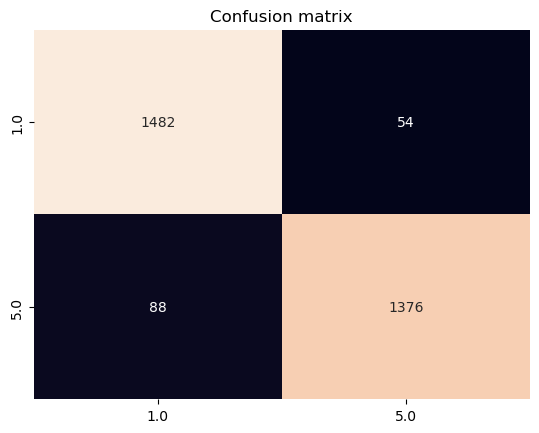

In [ ]:
labels = grid_cv.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, cv_predictions),
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:

1-ый вариант:
 преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентый семантический анализ) (sklearn.decomposition.TruncatedSVD)

In [ ]:
gc.collect()

2093

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
clf_tfidf = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression())]
)

params_tfidf = {
    'vect__analyzer': ['word'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tfidf__use_idf': (True, False),
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores = ['accuracy','f1']

In [ ]:
grid_tfidf = GridSearchCV(
    clf_tfidf,
    param_grid=params_tfidf,
    cv=4,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_tfidf.fit(X_train, y_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits


C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
504 fits failed out of a total of 1008.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
504 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l1', 'l2'],
                         'tfidf__use_idf': (True, False),
                         'vect__analyzer': ['word'],
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [ ]:
print("Best score: %0.3f" % grid_tfidf.best_score_)

Best score: 0.945


In [ ]:
tfidf_predictions = grid_tfidf.best_estimator_.predict(X_test)

In [ ]:
print_acc(tfidf_predictions)

Precision:   0.96
Recall:      0.96
F1_score:    0.96
Accuracy:    0.96


In [ ]:
print(classification_report(y_test, tfidf_predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96      1536
         5.0       0.97      0.94      0.96      1464

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



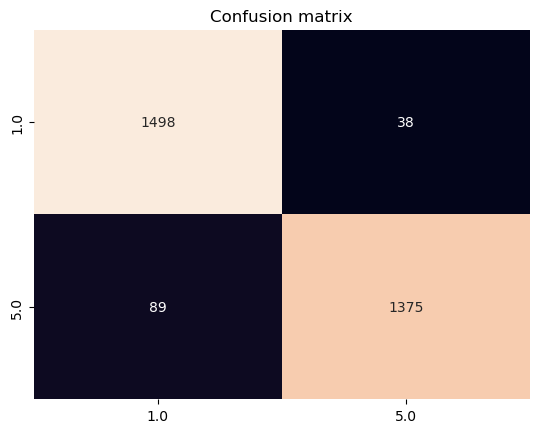

In [ ]:
labels = grid_tfidf.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, tfidf_predictions),
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

Cингулярное разложение

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
clf_SVD = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('tsvd', TruncatedSVD()),
     ('clf', LogisticRegression())]
)

params_SVD = {
    'vect__analyzer': ['word'],
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tsvd__n_components': [5, 10, 25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores = ['accuracy','f1']

In [ ]:
grid_SVD = GridSearchCV(
    clf_SVD,
    param_grid=params_SVD,
    cv=4,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_SVD.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Suile\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('tsvd', TruncatedSVD()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l1', 'l2'],
                         'tsvd__n_components': [5, 10, 25, 50, 100],
                         'vect__analyzer': ['word'],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [ ]:
print("Best score: %0.3f" % grid_SVD.best_score_)

Best score: 0.939


In [ ]:
svd_predictions = grid_SVD.best_estimator_.predict(X_test)

In [ ]:
print_acc(svd_predictions)

Precision:   0.95
Recall:      0.95
F1_score:    0.95
Accuracy:    0.95


In [ ]:
print(classification_report(y_test, svd_predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1536
         5.0       0.95      0.94      0.95      1464

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



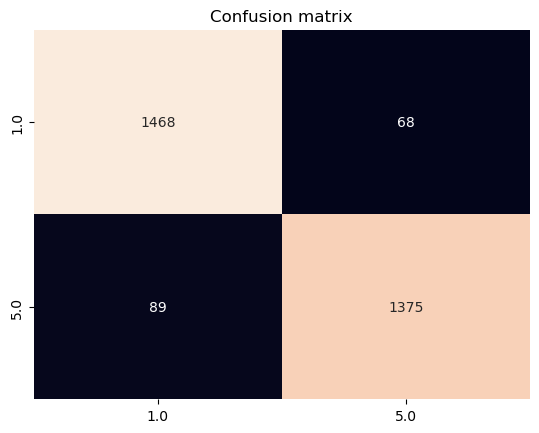

In [ ]:
labels = grid_SVD.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, svd_predictions),
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation). Используйте accuracy и F-measure для оценки качества классификации.

In [ ]:
gc.collect()

6670

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
clf_LDA = Pipeline(
    [('vect', CountVectorizer()),
     ('lda', LatentDirichletAllocation()),
     ('clf', LogisticRegression())]
)

params_LDA = {
    'vect__analyzer': ['word'],
    'vect__max_df': [0.75],
    'vect__ngram_range': [(1, 1)],
    'lda__n_components' : [25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l2']
}

scores = ['accuracy', 'f1']

In [ ]:
grid_LDA = GridSearchCV(
    clf_LDA,
    param_grid=params_LDA,
    cv=4,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_LDA.fit(X_train, y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('lda', LatentDirichletAllocation()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'clf__penalty': ['l2'],
                         'lda__n_components': [25, 50, 100],
                         'vect__analyzer': ['word'], 'vect__max_df': [0.75],
                         'vect__ngram_range': [(1, 1)]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [ ]:
print("Best score: %0.3f" % grid_LDA.best_score_)

Best score: 0.905


In [ ]:
lda_predictions = grid_LDA.best_estimator_.predict(X_test)

In [ ]:
print_acc(lda_predictions)

Precision:   0.91
Recall:      0.91
F1_score:    0.91
Accuracy:    0.91


In [ ]:
print(classification_report(y_test, lda_predictions))

              precision    recall  f1-score   support

         1.0       0.89      0.93      0.91      1536
         5.0       0.92      0.89      0.90      1464

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



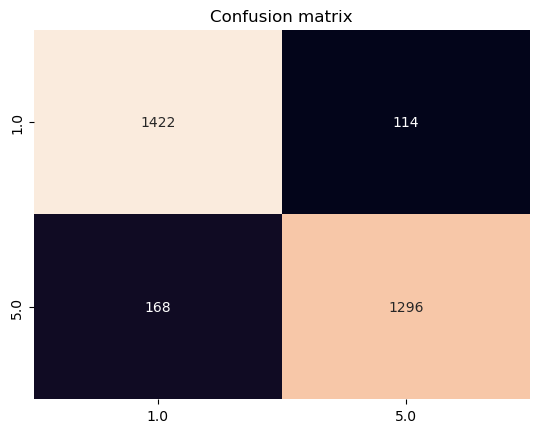

In [ ]:
labels = grid_LDA.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, lda_predictions),
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

In [ ]:
for model in ['grid_cv', 'grid_tfidf', 'grid_SVD', 'grid_LDA']:
    print(model[5:])
    predictions = eval(model).best_estimator_.predict(X_test)
    print("f1_score: {0:6.3f}\nAccuracy: {0:6.3f}\n\n".format(
        f1_score(y_test, predictions, average='macro'),
        accuracy_score(y_test, predictions)))

cv
f1_score:  0.953
Accuracy:  0.953


tfidf
f1_score:  0.958
Accuracy:  0.958


SVD
f1_score:  0.948
Accuracy:  0.948


LDA
f1_score:  0.906
Accuracy:  0.906




#### Выводы:

Модель на основк 𝑡𝑓−𝑖𝑑𝑓 имеет больший процент правильных ответов на тестовой выборке